# Data Preprocessing - Home Credit Default Risk

## Goal
This notebook shows how to clean and prepare data for machine learning.

## Steps:
1. Load data
2. Handle missing values
3. Encode categorical variables
4. Scale numerical features
5. Save processed data

---


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import os

# Settings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Matplotlib is building the font cache; this may take a moment.


📚 Библиотеки успешно импортированы!
Pandas version: 2.3.2
NumPy version: 2.3.3


## 1. Load Data


In [3]:
# Load data
print("Loading data...")

# Load training data
train_df = pd.read_csv('../data_raw/application_train.csv')
print(f"Training data loaded: {train_df.shape}")

# Load test data
test_df = pd.read_csv('../data_raw/application_test.csv')
print(f"Test data loaded: {test_df.shape}")

# Load column descriptions with proper encoding
try:
    columns_desc = pd.read_csv('../data_raw/HomeCredit_columns_description.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        columns_desc = pd.read_csv('../data_raw/HomeCredit_columns_description.csv', encoding='latin-1')
    except UnicodeDecodeError:
        columns_desc = pd.read_csv('../data_raw/HomeCredit_columns_description.csv', encoding='cp1252')

print(f"Column descriptions loaded: {columns_desc.shape}")

print("\nData overview:")
print(f"Total records: {len(train_df):,}")
print(f"Number of features: {train_df.shape[1]}")
print(f"Target variable: {train_df['TARGET'].value_counts().to_dict()}")
print(f"Default rate: {train_df['TARGET'].mean()*100:.2f}%")


Loading data...
Training data loaded: (307511, 122)
Test data loaded: (48744, 121)
Column descriptions loaded: (219, 5)

Data overview:
Total records: 307,511
Number of features: 122
Target variable: {0: 282686, 1: 24825}
Default rate: 8.07%


In [4]:
# Check data types
print("Data types:")
print(train_df.dtypes.value_counts())

print("\nFirst 5 rows:")
train_df.head()


Data types:
float64    65
int64      41
object     16
Name: count, dtype: int64

First 5 rows:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Handle Missing Values


Missing values analysis:

Columns with missing values (67 out of 122):
                      Column  Missing_Count  Missing_Percent
76           COMMONAREA_MEDI         214865        69.872297
48            COMMONAREA_AVG         214865        69.872297
62           COMMONAREA_MODE         214865        69.872297
84  NONLIVINGAPARTMENTS_MEDI         213514        69.432963
70  NONLIVINGAPARTMENTS_MODE         213514        69.432963
56   NONLIVINGAPARTMENTS_AVG         213514        69.432963
86        FONDKAPREMONT_MODE         210295        68.386172
68     LIVINGAPARTMENTS_MODE         210199        68.354953
82     LIVINGAPARTMENTS_MEDI         210199        68.354953
54      LIVINGAPARTMENTS_AVG         210199        68.354953
66            FLOORSMIN_MODE         208642        67.848630
80            FLOORSMIN_MEDI         208642        67.848630
52             FLOORSMIN_AVG         208642        67.848630
61          YEARS_BUILD_MODE         204488        66.497784
75          YE

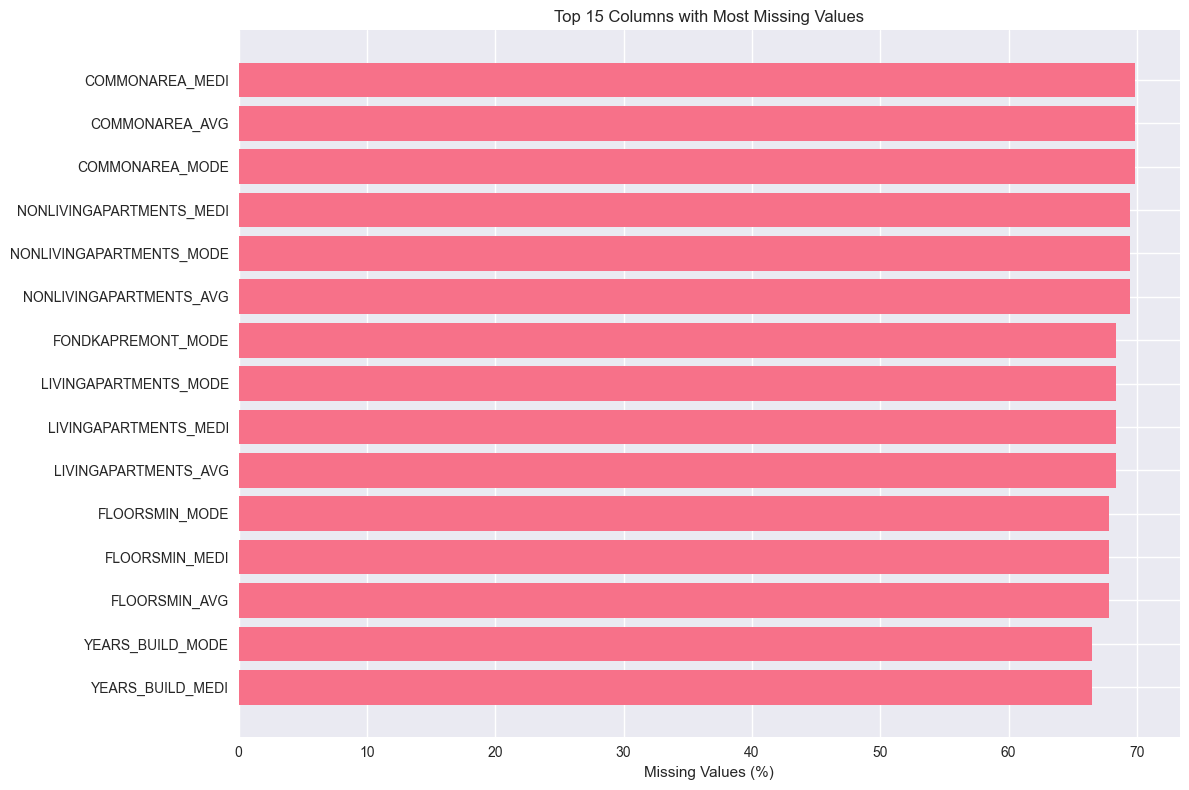

In [5]:
# Check missing values
print("Missing values analysis:")

# Count missing values
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100

# Create DataFrame with missing values info
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
})

# Sort by missing percentage
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"\nColumns with missing values ({len(missing_df)} out of {len(train_df.columns)}):")
print(missing_df.head(20))

# Plot missing values
plt.figure(figsize=(12, 8))
if len(missing_df) > 0:
    top_missing = missing_df.head(15)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percent'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Values (%)')
    plt.title('Top 15 Columns with Most Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


## 3. Process Missing Values


In [6]:
# Create copies for processing
train_processed = train_df.copy()
test_processed = test_df.copy()

print("Processing missing values...")

# Function to handle missing values
def handle_missing_values(df, is_train=True):
    """
    Handle missing values in dataset
    """
    df_processed = df.copy()
    
    # 1. Remove columns with >50% missing values
    high_missing_cols = []
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() / len(df_processed) > 0.5:
            high_missing_cols.append(col)
    
    if high_missing_cols:
        print(f"Removing columns with >50% missing values: {high_missing_cols}")
        df_processed = df_processed.drop(columns=high_missing_cols)
    
    # 2. Fill numerical columns with median
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    numeric_missing = [col for col in numeric_cols if df_processed[col].isnull().any()]
    
    if numeric_missing:
        print(f"Filling numerical columns with median: {len(numeric_missing)} columns")
        for col in numeric_missing:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # 3. Fill categorical columns with mode
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    categorical_missing = [col for col in categorical_cols if df_processed[col].isnull().any()]
    
    if categorical_missing:
        print(f"Filling categorical columns with mode: {len(categorical_missing)} columns")
        for col in categorical_missing:
            mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown'
            df_processed[col].fillna(mode_value, inplace=True)
    
    return df_processed

# Process data
train_processed = handle_missing_values(train_processed, is_train=True)
test_processed = handle_missing_values(test_processed, is_train=False)

print(f"\nProcessing completed!")
print(f"Train size after processing: {train_processed.shape}")
print(f"Test size after processing: {test_processed.shape}")

# Check remaining missing values
remaining_missing_train = train_processed.isnull().sum().sum()
remaining_missing_test = test_processed.isnull().sum().sum()

print(f"\nRemaining missing values:")
print(f"Train: {remaining_missing_train}")
print(f"Test: {remaining_missing_test}")


Processing missing values...
Removing columns with >50% missing values: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
Filling numerical columns with median: 23 columns
Filling categorical columns with mode: 3 columns
Removing column

## 4. Encode Categorical Variables


In [7]:
# Check categorical variables
print("Categorical variables analysis:")

categorical_cols = train_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_cols)} categorical columns:")
for col in categorical_cols:
    unique_count = train_processed[col].nunique()
    print(f"  - {col}: {unique_count} unique values")

# Function to encode categorical variables
def encode_categorical_variables(df_train, df_test):
    """
    Encode categorical variables using LabelEncoder
    """
    df_train_encoded = df_train.copy()
    df_test_encoded = df_test.copy()
    
    categorical_cols = df_train_encoded.select_dtypes(include=['object']).columns.tolist()
    label_encoders = {}
    
    print(f"\nEncoding {len(categorical_cols)} categorical columns...")
    
    for col in categorical_cols:
        if col in df_train_encoded.columns and col in df_test_encoded.columns:
            # Create LabelEncoder
            le = LabelEncoder()
            
            # Combine unique values from train and test for fitting
            all_values = pd.concat([df_train_encoded[col], df_test_encoded[col]]).astype(str)
            le.fit(all_values)
            
            # Apply encoding
            df_train_encoded[col] = le.transform(df_train_encoded[col].astype(str))
            df_test_encoded[col] = le.transform(df_test_encoded[col].astype(str))
            
            label_encoders[col] = le
            print(f"  Done {col}: {len(le.classes_)} classes")
    
    return df_train_encoded, df_test_encoded, label_encoders

# Apply encoding
train_encoded, test_encoded, encoders = encode_categorical_variables(train_processed, test_processed)

print(f"\nEncoding completed!")
print(f"Train size after encoding: {train_encoded.shape}")
print(f"Test size after encoding: {test_encoded.shape}")


Categorical variables analysis:
Found 13 categorical columns:
  - NAME_CONTRACT_TYPE: 2 unique values
  - CODE_GENDER: 3 unique values
  - FLAG_OWN_CAR: 2 unique values
  - FLAG_OWN_REALTY: 2 unique values
  - NAME_TYPE_SUITE: 7 unique values
  - NAME_INCOME_TYPE: 8 unique values
  - NAME_EDUCATION_TYPE: 5 unique values
  - NAME_FAMILY_STATUS: 6 unique values
  - NAME_HOUSING_TYPE: 6 unique values
  - OCCUPATION_TYPE: 18 unique values
  - WEEKDAY_APPR_PROCESS_START: 7 unique values
  - ORGANIZATION_TYPE: 58 unique values
  - EMERGENCYSTATE_MODE: 2 unique values

Encoding 13 categorical columns...
  Done NAME_CONTRACT_TYPE: 2 classes
  Done CODE_GENDER: 3 classes
  Done FLAG_OWN_CAR: 2 classes
  Done FLAG_OWN_REALTY: 2 classes
  Done NAME_TYPE_SUITE: 7 classes
  Done NAME_INCOME_TYPE: 8 classes
  Done NAME_EDUCATION_TYPE: 5 classes
  Done NAME_FAMILY_STATUS: 6 classes
  Done NAME_HOUSING_TYPE: 6 classes
  Done OCCUPATION_TYPE: 18 classes
  Done WEEKDAY_APPR_PROCESS_START: 7 classes
  Do

## 5. Scale Numerical Features


In [8]:
# Prepare data for scaling
print("Preparing data for scaling...")

# Exclude ID and target variable from scaling
exclude_cols = ['SK_ID_CURR', 'TARGET']
feature_cols = [col for col in train_encoded.columns if col not in exclude_cols]

print(f"Number of features to scale: {len(feature_cols)}")

# Separate numerical and categorical features
numeric_features = train_encoded[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {len(numeric_features)}")

# Function to scale features
def scale_features(df_train, df_test, feature_cols):
    """
    Scale numerical features
    """
    df_train_scaled = df_train.copy()
    df_test_scaled = df_test.copy()
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Fit on train data
    df_train_scaled[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    
    # Apply to test data
    df_test_scaled[feature_cols] = scaler.transform(df_test[feature_cols])
    
    return df_train_scaled, df_test_scaled, scaler

# Apply scaling
train_scaled, test_scaled, scaler = scale_features(train_encoded, test_encoded, numeric_features)

print(f"\nScaling completed!")
print(f"Train size after scaling: {train_scaled.shape}")
print(f"Test size after scaling: {test_scaled.shape}")

# Check statistics after scaling
print(f"\nStatistics after scaling (first 5 numerical features):")
print(train_scaled[numeric_features[:5]].describe())


Preparing data for scaling...
Number of features to scale: 79
Numerical features: 79

Scaling completed!
Train size after scaling: (307511, 81)
Test size after scaling: (48744, 92)

Statistics after scaling (first 5 numerical features):
       NAME_CONTRACT_TYPE   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count        3.075110e+05  3.075110e+05  3.075110e+05     3.075110e+05   
mean        -6.927255e-17 -2.310625e-18 -9.260987e-17     6.146264e-17   
std          1.000002e+00  1.000002e+00  1.000002e+00     1.000002e+00   
min         -3.243953e-01 -7.203700e-01 -7.179135e-01    -1.504820e+00   
25%         -3.243953e-01 -7.203700e-01 -7.179135e-01    -1.504820e+00   
50%         -3.243953e-01 -7.203700e-01 -7.179135e-01     6.645314e-01   
75%         -3.243953e-01  1.388015e+00  1.392925e+00     6.645314e-01   
max          3.082659e+00  3.496400e+00  1.392925e+00     6.645314e-01   

       CNT_CHILDREN  
count  3.075110e+05  
mean  -4.815343e-17  
std    1.000002e+00  
min   -5

## 6. Save Processed Data


In [9]:
# Save processed data
print("Saving processed data...")

# Create directory for processed data
os.makedirs('../data_processed', exist_ok=True)

# Save train data
train_scaled.to_csv('../data_processed/train_processed.csv', index=False)
print("train_processed.csv saved")

# Save test data
test_scaled.to_csv('../data_processed/test_processed.csv', index=False)
print("test_processed.csv saved")

# Save feature information
feature_info = {
    'total_features': len(feature_cols),
    'numeric_features': len(numeric_features),
    'categorical_features': len(categorical_cols),
    'feature_names': feature_cols,
    'numeric_feature_names': numeric_features,
    'categorical_feature_names': categorical_cols
}

import json
with open('../data_processed/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)
print("feature_info.json saved")

print(f"\nFinal statistics:")
print(f"Original train size: {train_df.shape}")
print(f"Processed train size: {train_scaled.shape}")
print(f"Original test size: {test_df.shape}")
print(f"Processed test size: {test_scaled.shape}")
print(f"Number of features: {len(feature_cols)}")
print(f"Target variable (default): {train_scaled['TARGET'].mean()*100:.2f}%")

print(f"\nData preprocessing completed successfully!")
print(f"Processed data saved in: ../data_processed/")


Saving processed data...
train_processed.csv saved
test_processed.csv saved
feature_info.json saved

Final statistics:
Original train size: (307511, 122)
Processed train size: (307511, 81)
Original test size: (48744, 121)
Processed test size: (48744, 92)
Number of features: 79
Target variable (default): 8.07%

Data preprocessing completed successfully!
Processed data saved in: ../data_processed/
